In [1]:
from sklearn.externals import joblib

word2vec_300_logistic = joblib.load("word2vec_300_logistic.pkl")

In [2]:
import pandas as pd
fake_pii = pd.read_csv("../clean_data/Cleaned_train_text_with_pii_2018_12_29_07_26_56_266227.csv")

# 0 denote no pii
# 1 denote pii exists
def binary_pii(label):
    pii_label = 0
    if label != "None":
        pii_label = 1
    return pii_label 


fake_pii["Target"] = fake_pii['Labels'].apply(binary_pii)

In [3]:
from gensim.models import Word2Vec

word2vec_300 = Word2Vec.load("./word2vec/word2vec_cleaned_300_.bin")

In [4]:
from word2vec_visualizer import find_part_pii, get_pii2vec_matrix, color_dict

In [5]:
from tqdm import tqdm
extracted_pii_list = [find_part_pii(text, model = word2vec_300)\
                      for text in tqdm(fake_pii["Cleaned_text"]) ]

100%|██████████| 800000/800000 [01:17<00:00, 10305.58it/s]


In [6]:
pii_matrix = get_pii2vec_matrix(pii_list = extracted_pii_list, model = word2vec_300)

100%|██████████| 800000/800000 [00:02<00:00, 293951.14it/s]


In [9]:
y_pred = word2vec_300_logistic.predict(pii_matrix)
y_true = fake_pii["Target"]

CPU times: user 708 ms, sys: 31.9 ms, total: 740 ms
Wall time: 704 ms


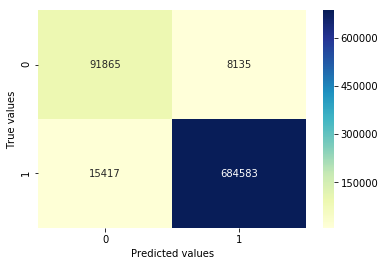

In [12]:
%%time
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_true = y_true, y_pred = y_pred), annot = True,fmt="d",cmap="YlGnBu")
plt.xlabel("Predicted values")
plt.ylabel("True values")

In [13]:
confusion_matrix(y_true = y_true, y_pred = y_pred)

array([[ 91865,   8135],
       [ 15417, 684583]])